Semana #4 Repaso

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
sym.init_printing(use_unicode=True)

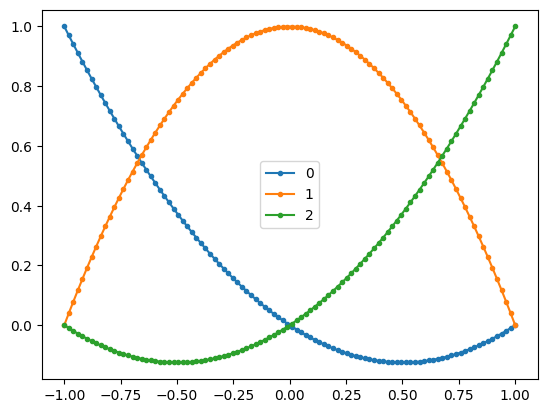

In [161]:
## L no es mas que una funcion que es expresada de una forma distinta
## En este caso cuando se evalue esta funcion va a tener tres posibles resultados
## Por tanto L al ser evaluada es una tupla de tres posiciones 
L = ( lambda x: 0.5*x*(x-1), lambda x: -(x+1)*(x-1), lambda x: 0.5*x*(x+1) )
x = np.linspace(-1,1,100)
F = np.zeros((x.shape[0],3))

for i in range(len(L)):
    F[:,i] = L[i](x)
    ## El '.-' Pasado por argumento hace que la funcion marque los puntos en los que esta definida
    plt.plot(x,F[:,i],'.-',label = str(i))
    plt.legend()


Interpolacion de Lagrange

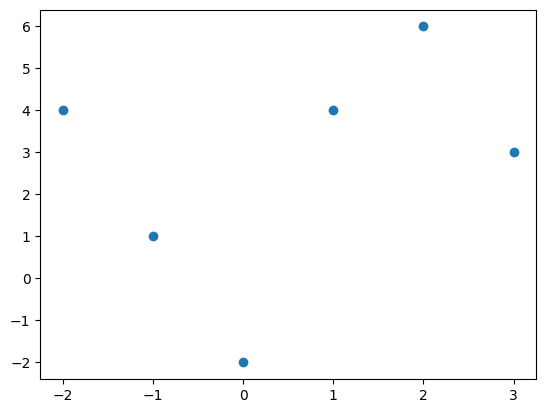

In [162]:
##Lo que se busca con la interpolacion de Lagrange es encontrar un polinomio que satisfaga pasar por cada uno de los puntos marcados 
##Donde X y Y son el conjunto soporte
X = np.array([-2,-1,0,1,2,3])
Y = np.array([4.,1.,-2.,4.,6.,3.])
plt.scatter(X,Y)

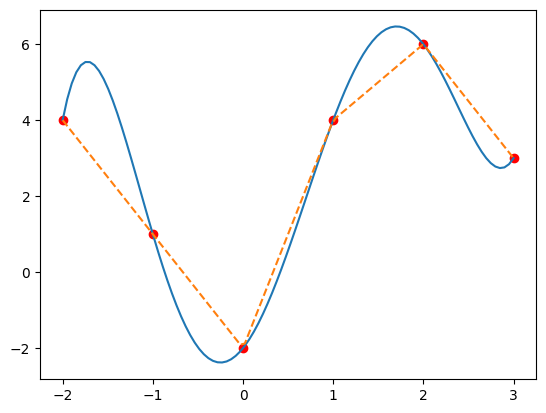

In [163]:
def BaseLagrange(x,X,i):
    '''
    Parametros:
    x = La variable x, sin embargo aca se trata como todos los puntos que quiero que queden graficados para el polinomio encontrado
    X = Conjunto soporte de los inputs
    i = X[i] es el numero que se debe evitar tomar para X[j] en la multiplicatoria
    '''
    L = 1
    for j in range(X.shape[0]):
     if j != i:
        L *= (x-X[j])/(X[i]-X[j])
    return L

def InterpolacionLagrange(x,X,Y):
   '''
    Parametros:
    x = La variable x, sin embargo aca se trata como todos los puntos que quiero que queden graficados para el polinomio encontrado
    X = Conjunto soporte de los inputs
    Y = Conjunto soporte de los outputs
    '''
   P = 0
   for i in range(X.shape[0]):
      P+=BaseLagrange(x,X,i) * Y[i]
   return P

x = np.linspace(-2.,3.,100)
plt.plot(x,InterpolacionLagrange(x,X,Y))
plt.plot(x,np.interp(x,X,Y), '--')
plt.scatter(X,Y,color='r',marker='o')


Sympy

In [164]:
##Sympy funciona para colocar las variables x y para observar el resultado sin necesidad de colocar valores exactos.

xa = sym.Symbol('x',real=True)
xa

In [165]:
BasesCardinales = []
for i in range(X.shape[0]):
    BasesCardinales.append(BaseLagrange(xa,X,i))
BasesCardinales

In [168]:
##Aca se hace uso de sympy para obtener el polinomio de una forma mas explicita
f = InterpolacionLagrange(xa,X,Y)
##Sym.simplify funciona para simplificar el polinomio para quedar de la forma mas reducida posible
f = sym.simplify(f)
##sym.diff diferencia la funcion, el ultimo parametro es la cantidad de veces que se quiere diferenciar. 
df = sym.diff(f,xa,1)
df = sym.diff(f,xa,2)
df

0.283333333333333*x^5 - 0.916666666666667*x^4 - 1.75*x^3 + 5.41666666666667*x^2 + 2.96666666666667*x - 2.0
